In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
control_df = pd.read_csv("first_day_condition.csv")
condition_df = pd.read_csv("first_day_control.csv")

In [3]:
frames = [control_df, condition_df]
ml_df = pd.concat(frames)
ml_df

,Unnamed: 0,0:00,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Id
0,0,480,245,424,242,733,58,600,822,8804,...,4555,22090,23678,18468,15814,9859,7203,2791,4072,condition
1,1,1532,1535,546,270,5704,9447,28610,19627,24468,...,29557,23204,15980,9892,8865,2279,24152,1160,283,condition
2,2,4408,2075,480,480,480,480,480,480,485,...,62600,36530,40782,19567,10192,19797,33566,14499,16344,condition
3,3,2220,423,203,28,569,388,11980,17591,16399,...,9726,13633,4575,22695,33011,25630,46288,39667,28332,condition
4,4,4835,3959,6457,807,1710,360,532,544,949,...,62282,15433,806,14013,15777,8858,6839,16246,14172,condition
5,5,4594,175,612,192,705,950,307,17239,14846,...,26181,2735,5547,10942,30557,6484,4104,6206,10447,condition
6,6,1068,917,606,676,596,34090,17938,14812,28039,...,21393,560,688,1327,11248,10405,17734,11928,15147,condition
7,7,1386,818,2135,974,241,1026,1812,688,1343,...,34133,31975,24406,35533,25412,19397,13320,28790,3784,condition
8,8,2882,871,411,2840,1243,506,1093,11200,21471,...,5402,12234,16475,15489,10836,10545,19962,8731,14398,condition
9,9,959,328,1629,641,440,548,346,12782,31878,...,37756,41776,48462,66345,45954,31324,26594,36162,4696,condition


In [4]:
ml_df.drop(['Unnamed: 0'], axis=1, inplace= True)

In [5]:
ml_df = ml_df.rename(columns = {'0:00': '00', '1:00': '01', '2:00': '02', '3:00' : '03', '4:00':'04', '5:00': '05', '6:00':'06', '7:00': '07', '8:00':'08', '9:00':'09', '10:00':'10', '11:00':'11', '12:00':'12', '13:00':'13', '14:00':'14', '15:00':'15', '16:00':'16', '17:00':'17', '18:00':'18', '19:00':'19', '20:00':'20', '21:00':'21', '22:00':'22', '23:00':'23' }, inplace = False)
ml_df= ml_df.reset_index(drop =True)

# Feature Selection 

In [6]:

ml_df

,00,01,02,03,04,05,06,07,08,09,...,15,16,17,18,19,20,21,22,23,Id
0,480,245,424,242,733,58,600,822,8804,6687,...,4555,22090,23678,18468,15814,9859,7203,2791,4072,condition
1,1532,1535,546,270,5704,9447,28610,19627,24468,30029,...,29557,23204,15980,9892,8865,2279,24152,1160,283,condition
2,4408,2075,480,480,480,480,480,480,485,19090,...,62600,36530,40782,19567,10192,19797,33566,14499,16344,condition
3,2220,423,203,28,569,388,11980,17591,16399,22316,...,9726,13633,4575,22695,33011,25630,46288,39667,28332,condition
4,4835,3959,6457,807,1710,360,532,544,949,9951,...,62282,15433,806,14013,15777,8858,6839,16246,14172,condition
5,4594,175,612,192,705,950,307,17239,14846,6839,...,26181,2735,5547,10942,30557,6484,4104,6206,10447,condition
6,1068,917,606,676,596,34090,17938,14812,28039,33920,...,21393,560,688,1327,11248,10405,17734,11928,15147,condition
7,1386,818,2135,974,241,1026,1812,688,1343,3193,...,34133,31975,24406,35533,25412,19397,13320,28790,3784,condition
8,2882,871,411,2840,1243,506,1093,11200,21471,25424,...,5402,12234,16475,15489,10836,10545,19962,8731,14398,condition
9,959,328,1629,641,440,548,346,12782,31878,24143,...,37756,41776,48462,66345,45954,31324,26594,36162,4696,condition


In [7]:
#creating a dataframe containing only the hour columns
df = ml_df[['00','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']]

In [8]:
#finding the maximum value, mean, median standard deviation and variance for each patient and making them individual columns
ml_df['Max'] = df.max(axis = 1)
ml_df['mean'] = df.mean(axis=1)
ml_df['median'] = df.median(axis = 1)
ml_df['SD'] = df.std(axis =1)
ml_df['Var'] = df.var(axis =1)
ml_df

,00,01,02,03,04,05,06,07,08,09,...,20,21,22,23,Id,Max,mean,median,SD,Var
0,480,245,424,242,733,58,600,822,8804,6687,...,9859,7203,2791,4072,condition,23739,9374.833333,6945.0,8838.539751,7.811978e+07
1,1532,1535,546,270,5704,9447,28610,19627,24468,30029,...,2279,24152,1160,283,condition,43085,15578.708333,17514.0,12469.206116,1.554811e+08
2,4408,2075,480,480,480,480,480,480,485,19090,...,19797,33566,14499,16344,condition,62600,16584.833333,15955.5,16121.695821,2.599091e+08
3,2220,423,203,28,569,388,11980,17591,16399,22316,...,25630,46288,39667,28332,condition,46288,14892.708333,12806.5,13139.484304,1.726460e+08
4,4835,3959,6457,807,1710,360,532,544,949,9951,...,8858,6839,16246,14172,condition,62282,11670.625000,7848.5,14530.252611,2.111282e+08
5,4594,175,612,192,705,950,307,17239,14846,6839,...,6484,4104,6206,10447,condition,39950,11082.291667,6345.0,11358.709083,1.290203e+08
6,1068,917,606,676,596,34090,17938,14812,28039,33920,...,10405,17734,11928,15147,condition,34775,15439.791667,14979.5,12895.015889,1.662814e+08
7,1386,818,2135,974,241,1026,1812,688,1343,3193,...,19397,13320,28790,3784,condition,43606,13314.625000,7409.0,13764.595491,1.894641e+08
8,2882,871,411,2840,1243,506,1093,11200,21471,25424,...,10545,19962,8731,14398,condition,35718,9887.791667,9064.5,9103.586551,8.287529e+07
9,959,328,1629,641,440,548,346,12782,31878,24143,...,31324,26594,36162,4696,condition,66345,25587.875000,29291.5,20411.586881,4.166329e+08


In [9]:
hour_df = ml_df.drop(['Max', 'mean', 'median', 'SD', 'Var'], axis = 1)

In [10]:
hour_df = pd.get_dummies(hour_df)
hour_df

,00,01,02,03,04,05,06,07,08,09,...,16,17,18,19,20,21,22,23,Id_condition,Id_control
0,480,245,424,242,733,58,600,822,8804,6687,...,22090,23678,18468,15814,9859,7203,2791,4072,1,0
1,1532,1535,546,270,5704,9447,28610,19627,24468,30029,...,23204,15980,9892,8865,2279,24152,1160,283,1,0
2,4408,2075,480,480,480,480,480,480,485,19090,...,36530,40782,19567,10192,19797,33566,14499,16344,1,0
3,2220,423,203,28,569,388,11980,17591,16399,22316,...,13633,4575,22695,33011,25630,46288,39667,28332,1,0
4,4835,3959,6457,807,1710,360,532,544,949,9951,...,15433,806,14013,15777,8858,6839,16246,14172,1,0
5,4594,175,612,192,705,950,307,17239,14846,6839,...,2735,5547,10942,30557,6484,4104,6206,10447,1,0
6,1068,917,606,676,596,34090,17938,14812,28039,33920,...,560,688,1327,11248,10405,17734,11928,15147,1,0
7,1386,818,2135,974,241,1026,1812,688,1343,3193,...,31975,24406,35533,25412,19397,13320,28790,3784,1,0
8,2882,871,411,2840,1243,506,1093,11200,21471,25424,...,12234,16475,15489,10836,10545,19962,8731,14398,1,0
9,959,328,1629,641,440,548,346,12782,31878,24143,...,41776,48462,66345,45954,31324,26594,36162,4696,1,0


In [11]:
#dataframe with only the features extracted (mean, median, SD, Var, Max)
ml_df = ml_df.drop(['00','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'], axis = 1)
ml_df

,Id,Max,mean,median,SD,Var
0,condition,23739,9374.833333,6945.0,8838.539751,7.811978e+07
1,condition,43085,15578.708333,17514.0,12469.206116,1.554811e+08
2,condition,62600,16584.833333,15955.5,16121.695821,2.599091e+08
3,condition,46288,14892.708333,12806.5,13139.484304,1.726460e+08
4,condition,62282,11670.625000,7848.5,14530.252611,2.111282e+08
5,condition,39950,11082.291667,6345.0,11358.709083,1.290203e+08
6,condition,34775,15439.791667,14979.5,12895.015889,1.662814e+08
7,condition,43606,13314.625000,7409.0,13764.595491,1.894641e+08
8,condition,35718,9887.791667,9064.5,9103.586551,8.287529e+07
9,condition,66345,25587.875000,29291.5,20411.586881,4.166329e+08


# Visualisation

<AxesSubplot:xlabel='Id', ylabel='Max'>

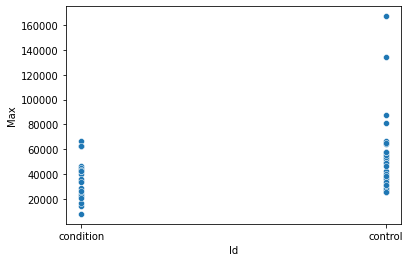

In [12]:
#graphing the Max values of condition and control patients
sns.scatterplot(y = ml_df['Max'], x = ml_df['Id'])

<AxesSubplot:xlabel='Id', ylabel='mean'>

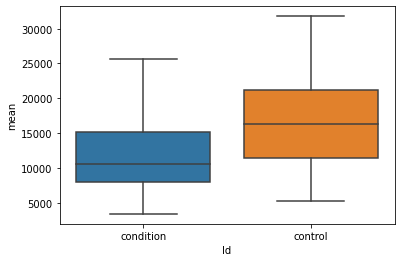

In [13]:
#graphing the mean values of condition and control patients
sns.boxplot(y = ml_df['mean'], x = ml_df['Id'])

<AxesSubplot:xlabel='Id', ylabel='median'>

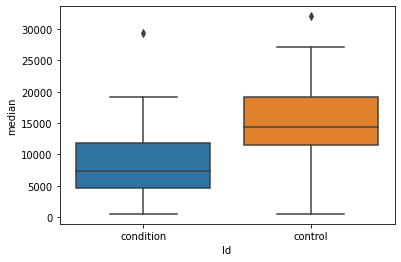

In [14]:
#graphing the median values of condition and control patients
sns.boxplot(y = ml_df['median'], x = ml_df['Id'])

<AxesSubplot:xlabel='Id', ylabel='SD'>

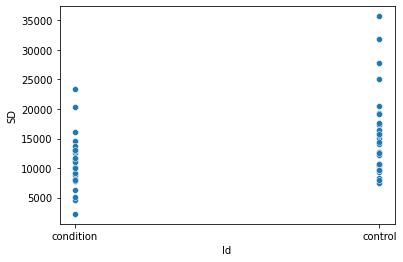

In [15]:
#graphing the standard deviation values of condition and control patients
sns.scatterplot(y = ml_df['SD'], x = ml_df['Id'])

<AxesSubplot:xlabel='Id', ylabel='Var'>

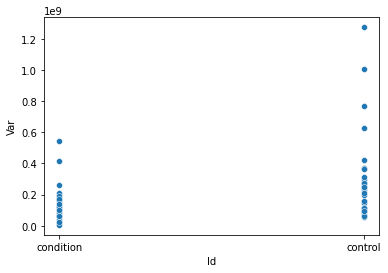

In [16]:
#graphing the variance values of condition and control patients
sns.scatterplot(y = ml_df['Var'], x = ml_df['Id'])

In [17]:
ml_df = pd.get_dummies(ml_df)

# Machine Learning models

In [18]:
y = ml_df['Id_condition']
X = ml_df.drop(['Id_control', 'Id_condition'], axis =1)

In [19]:
from sklearn.model_selection import train_test_split

#I'm initally using a 70/30 split to compare with a different training/test split later 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)
print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  41
Y training:  41
X test:  14
Y test:  14


In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion ='gini', splitter = 'best')
#model.fit(X_train, Y_train)
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

>1, train: 0.732, test: 0.929
>2, train: 0.756, test: 0.857
>3, train: 0.756, test: 0.857
>4, train: 0.854, test: 0.786
>5, train: 0.878, test: 0.571
>6, train: 0.951, test: 0.643
>7, train: 0.976, test: 0.643
>8, train: 0.976, test: 0.714
>9, train: 1.000, test: 0.643
>10, train: 1.000, test: 0.643
>11, train: 1.000, test: 0.714
>12, train: 1.000, test: 0.643
>13, train: 1.000, test: 0.643
>14, train: 1.000, test: 0.643


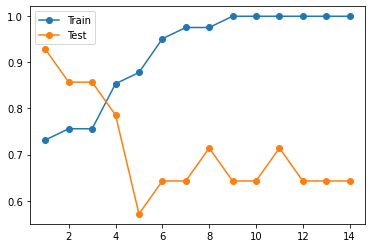

In [21]:
from sklearn.metrics import accuracy_score
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1,15 )]
for i in values:
    # configure the model
    model =  DecisionTreeClassifier(criterion ='gini', splitter = 'best',max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, Y_train)
    # evaluate on the train dataset
    train_y = model.predict(X_train)
    train_acc = accuracy_score(Y_train, train_y)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_y = model.predict(X_test)
    test_acc = accuracy_score(Y_test, test_y)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

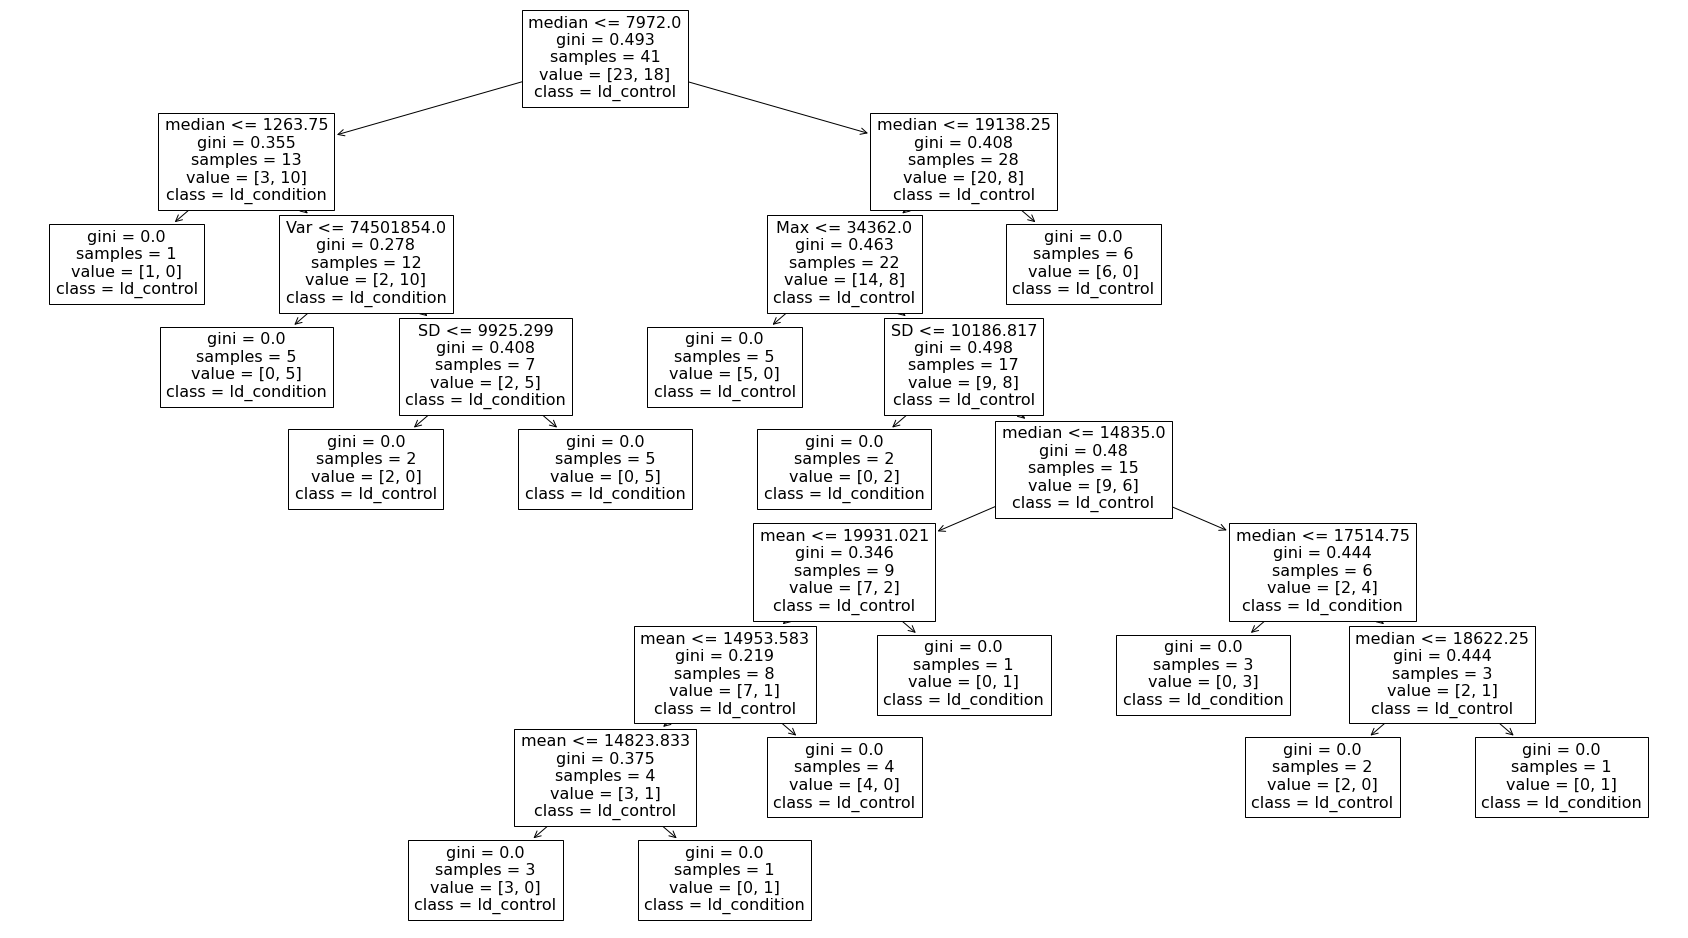

In [22]:
from sklearn.tree import plot_tree
plt.rcParams["figure.figsize"] = (30,17)
fn = ['Max', 'mean', 'median', 'SD', 'Var']
cn = ['Id_control', 'Id_condition']
tree = plot_tree(fitModel, feature_names = fn, class_names= cn)

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y)

array([[7, 2],
       [3, 2]], dtype=int64)

In [24]:
accuracy_score(y_pred, pred_y)

0.6428571428571429

In [25]:
from sklearn.model_selection import cross_val_score
#I also used cross val to make sure my model score is consistent throughout the data size
cvs = 4
cross_val_score(fitModel, X, y, cv = cvs)

array([0.57142857, 0.57142857, 0.5       , 0.61538462])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, pred_y))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.50      0.40      0.44         5

    accuracy                           0.64        14
   macro avg       0.60      0.59      0.59        14
weighted avg       0.63      0.64      0.63        14



Random Forest

In [27]:
y = ml_df['Id_condition']
X = ml_df.drop(['Id_control', 'Id_condition'], axis =1)

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#I'm initally using a 70/30 split to compare with a different training/test split later 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)
print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  41
Y training:  41
X test:  14
Y test:  14


In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=14)
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

>1, train: 0.780, test: 0.714
>2, train: 0.902, test: 0.571
>3, train: 0.951, test: 0.643
>4, train: 0.902, test: 0.643
>5, train: 0.927, test: 0.571
>6, train: 0.951, test: 0.571
>7, train: 0.951, test: 0.571
>8, train: 0.976, test: 0.643
>9, train: 0.951, test: 0.571
>10, train: 0.951, test: 0.643
>11, train: 0.976, test: 0.571
>12, train: 0.976, test: 0.643
>13, train: 0.951, test: 0.643
>14, train: 1.000, test: 0.500
>15, train: 1.000, test: 0.643
>16, train: 1.000, test: 0.643
>17, train: 1.000, test: 0.571
>18, train: 1.000, test: 0.714
>19, train: 1.000, test: 0.643


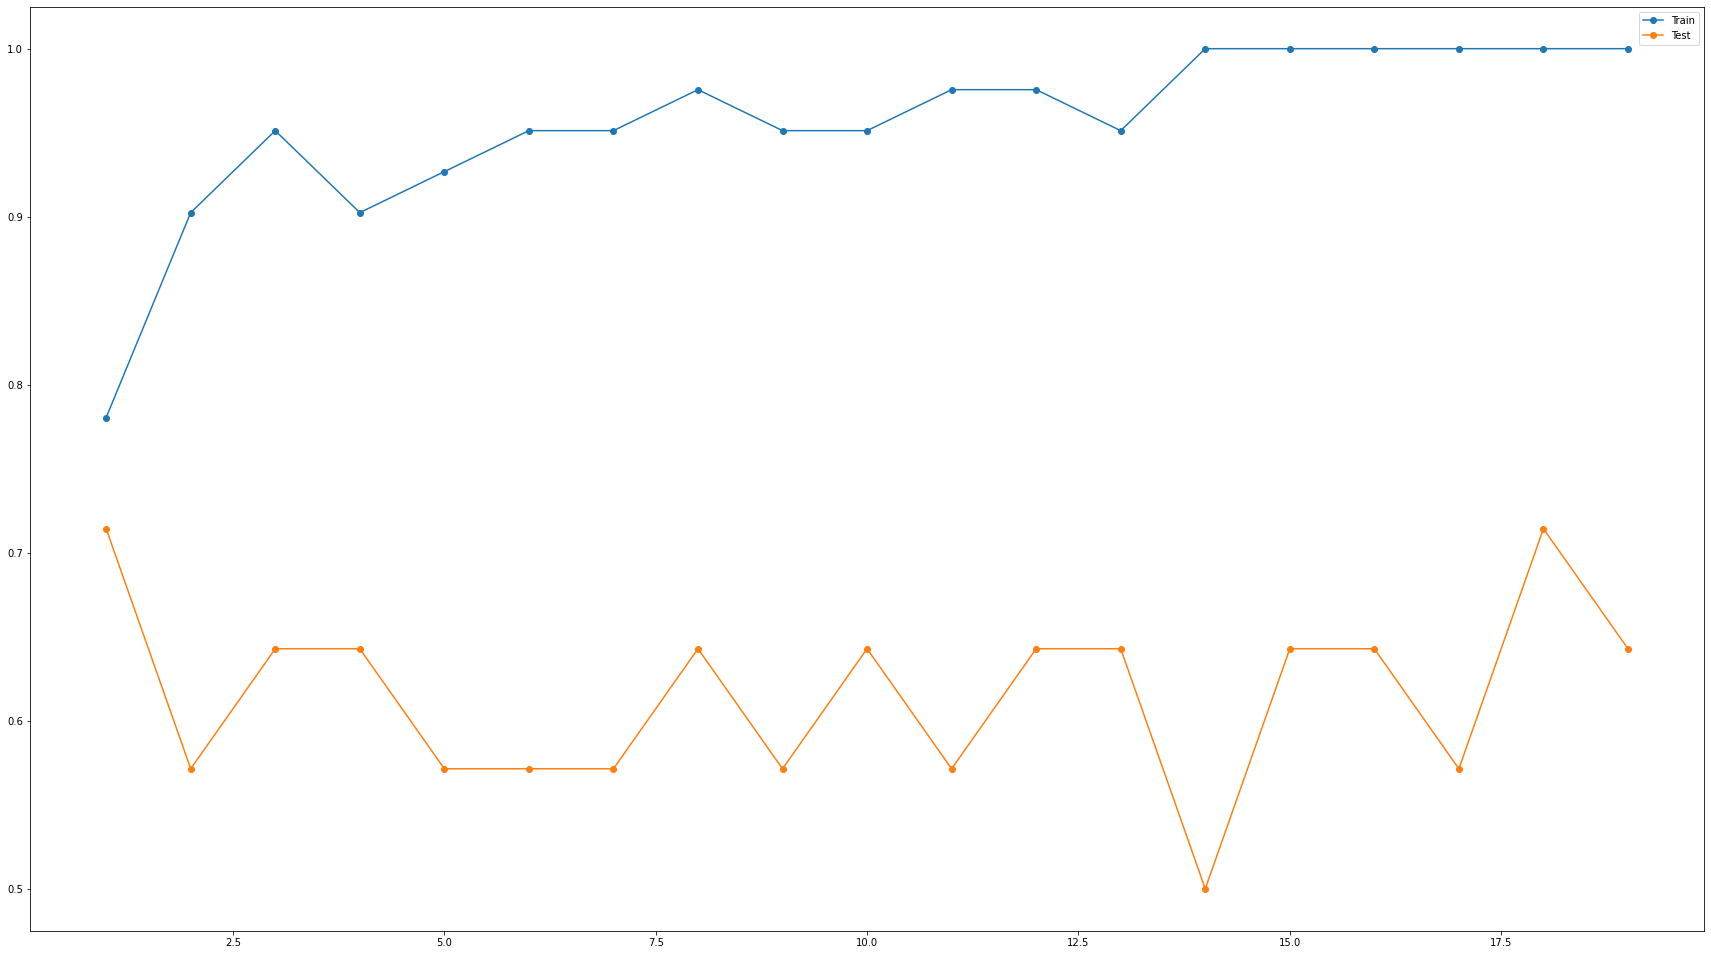

In [30]:
from sklearn.ensemble import RandomForestClassifier
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1,20 )]
for i in values:
    # configure the model
    model = RandomForestClassifier(n_estimators=i, bootstrap = True)
    # fit model on the training dataset
    model.fit(X_train, Y_train)
    # evaluate on the train dataset
    train_y = model.predict(X_train)
    train_acc = accuracy_score(Y_train, train_y)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_y = model.predict(X_test)
    test_acc = accuracy_score(Y_test, test_y)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y)

array([[5, 1],
       [3, 5]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.7142857142857143

In [33]:
from sklearn.model_selection import cross_val_score
#I also used cross val to make sure my model score is consistent throughout the data size
cross_val_score(fitModel, X, y, cv = cvs)

array([0.64285714, 0.57142857, 0.57142857, 0.76923077])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, pred_y))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.83      0.62      0.71         8

    accuracy                           0.71        14
   macro avg       0.73      0.73      0.71        14
weighted avg       0.74      0.71      0.71        14



Nearest Neighbour

In [35]:
y = ml_df['Id_condition']
X = ml_df.drop(['Id_control', 'Id_condition'], axis =1)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# standardscaler fitted to judge the weight of each feature
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
#choosing the K value and the distance metric
model = KNeighborsClassifier(n_neighbors = 3, metric= 'manhattan')
fitModel = model.fit(X_train, Y_train)
#predicitng test set results
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

>1, train: 1.000, test: 0.643
>2, train: 0.805, test: 0.571
>3, train: 0.756, test: 0.571
>4, train: 0.756, test: 0.571
>5, train: 0.805, test: 0.643
>6, train: 0.805, test: 0.643
>7, train: 0.780, test: 0.643
>8, train: 0.707, test: 0.571
>9, train: 0.780, test: 0.643
>10, train: 0.732, test: 0.643
>11, train: 0.805, test: 0.643
>12, train: 0.780, test: 0.571
>13, train: 0.780, test: 0.571
>14, train: 0.659, test: 0.429


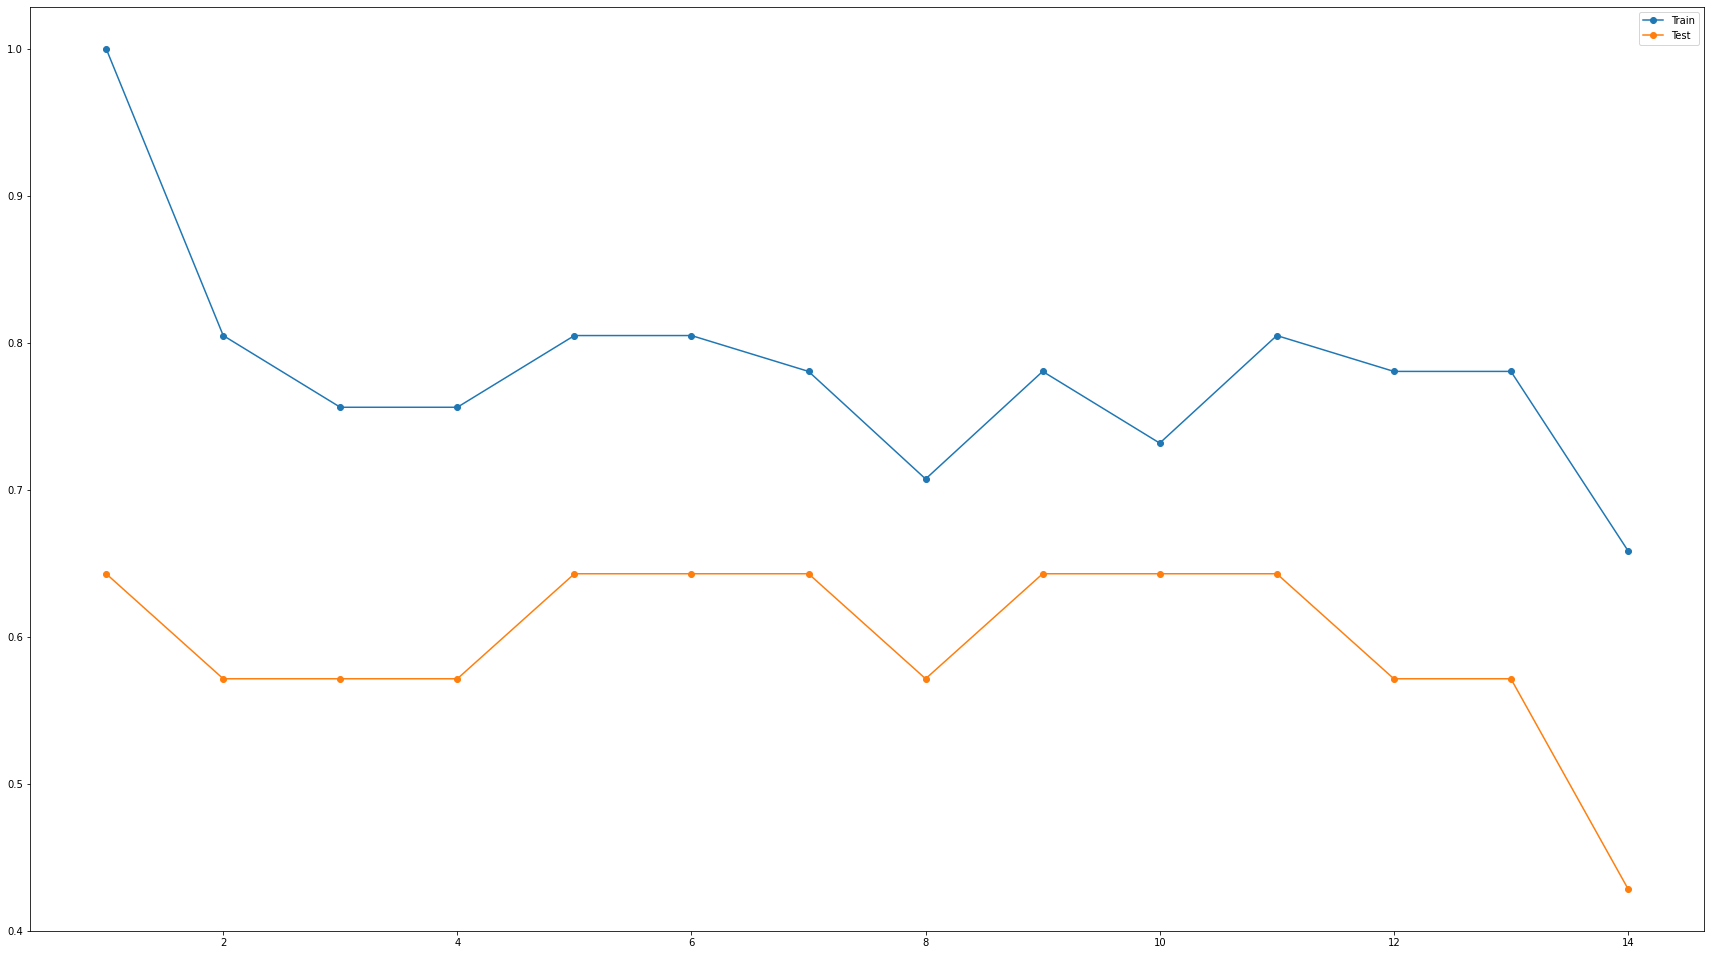

In [38]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1,15 )]
for i in values:
    # configure the model
    model = KNeighborsClassifier(n_neighbors = i, metric= 'manhattan')
    # fit model on the training dataset
    model.fit(X_train, Y_train)
    # evaluate on the train dataset
    train_y = model.predict(X_train)
    train_acc = accuracy_score(Y_train, train_y)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_y = model.predict(X_test)
    test_acc = accuracy_score(Y_test, test_y)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [39]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, pred_y)

array([[3, 3],
       [3, 5]], dtype=int64)

In [40]:
accuracy_score(y_pred, pred_y)

0.5714285714285714

In [41]:
from sklearn.model_selection import cross_val_score
#I also used cross val to make sure my model score is consistent throughout the data size
cross_val_score(fitModel, X, y, cv = cvs)

array([0.64285714, 0.64285714, 0.57142857, 0.69230769])

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, pred_y))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.62      0.62      0.62         8

    accuracy                           0.57        14
   macro avg       0.56      0.56      0.56        14
weighted avg       0.57      0.57      0.57        14



SVM

In [43]:
from sklearn.model_selection import train_test_split
y = ml_df['Id_condition']
X = ml_df.drop(['Id_control', 'Id_condition'], axis =1)
#I'm initally using a 70/30 split to compare with a different training/test split later 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5, shuffle = True)
print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  27
Y training:  27
X test:  28
Y test:  28


In [44]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
#using  a linear kernel as it separates the both classes more accurately 
model = make_pipeline(StandardScaler(), SVC(random_state = True,  kernel = 'linear'))
fitModel = model.fit(X_train, Y_train)
#predicitng test set results
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

In [45]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, pred_y)

array([[13,  5],
       [ 4,  6]], dtype=int64)

In [46]:
accuracy_score(y_pred, pred_y)

0.6785714285714286

In [47]:
cross_val_score(fitModel, X, y, cv = cvs)

array([0.71428571, 0.71428571, 0.71428571, 0.76923077])

In [48]:
print(classification_report(y_pred, pred_y))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.55      0.60      0.57        10

    accuracy                           0.68        28
   macro avg       0.66      0.66      0.66        28
weighted avg       0.69      0.68      0.68        28



Hour DATAFRAME

In [49]:
y = hour_df['Id_condition']
X = hour_df.drop(['Id_control', 'Id_condition'], axis =1)

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#I'm initally using a 75/25 split to compare with a different training/test split later 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)
print("X training: ", len(X_train))
print("Y training: ", len(Y_train))
print("X test: ", len(X_test))
print("Y test: ", len(Y_test))

X training:  41
Y training:  41
X test:  14
Y test:  14


In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,)
fitModel = model.fit(X_train, Y_train)
pred_y = model.predict(X_test)
pred_y
y_pred = Y_test

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, pred_y)

array([[5, 1],
       [3, 5]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, pred_y)

0.7142857142857143

In [54]:
from sklearn.model_selection import cross_val_score
#I also used cross val to make sure my model score is consistent throughout the data size
cross_val_score(fitModel, X, y, cv = cvs)

array([0.64285714, 0.64285714, 0.71428571, 0.69230769])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, pred_y))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.83      0.62      0.71         8

    accuracy                           0.71        14
   macro avg       0.73      0.73      0.71        14
weighted avg       0.74      0.71      0.71        14

